In [24]:
import numpy as np
import scipy as sp 

# Brownian motion 

Basically it's a Martingale that walks around randomly, and by that i mean gaussian increments with linear variance and we start at 0 see the wiki page: https://en.wikipedia.org/wiki/Brownian_motion. 
Anyway, we get $\Delta X_t \sim \mathcal{N}(\mu \Delta t,\sigma ^2 \Delta t) \implies X_T \sim \mathcal{N}(\mu T, \sigma ^2 T)$ We get here by simple integration, and this is true by the properties that i sort of skipped explaining in detail. 



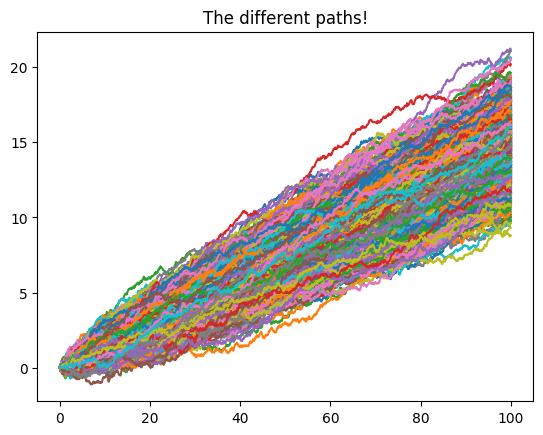

In [25]:
import numpy as np 
import matplotlib.pyplot as plt 

np.random.seed()

paths : int = 1000
steps : int = 1000

mu : float  = 0.15
sigma : float = 0.2
T : int = 100 

t_vec, dt = np.linspace(0, T, steps, retstep=True) 
X0 = np.zeros((paths, 1))        # each path starts at zero

# here we can sample using norm.rvs or we can do it the numpy way

rng = np.random.default_rng() # default seed is 0
increments = rng.normal(loc=mu *dt, scale= np.sqrt(dt) * sigma, size = (paths, steps -1)) # random steps 

X = np.concatenate((X0, increments), axis=1)
X = X.cumsum(1)
# So now we have the random walk and we can plot this 

plt.plot(t_vec, X.T)
plt.title("The different paths!")
plt.show()



We can get the expectation $E[X_T] = \mu T$ and $std[X_T] = \sigma \sqrt{T}$

In [ ]:
X_end = X[:, -1] # all final positions of the walk 

print(f"Exception of X at T: {X_end.mean()}")
print(f"Std of X at time T: {X_end.std(ddof=1)}")


[12.50293667 12.67879386 14.66521592 14.53397267 16.01196708 18.09967794
 14.38315146  9.7486809  11.65542637 12.77848878 15.68158116 15.04112134
 13.90908997 18.44026553 13.97385592 11.9193053  13.15410503 14.72076683
 16.20931304 15.84379949 16.09294133 14.61801093 16.32379253 13.71625012
 17.94763252 10.1721298  14.49239121 14.59151927 14.24820746 17.44398841
 15.07385102 14.04167332 12.43566279 16.26717237 19.2462255  17.21982616
 15.23606318 12.68774778 15.550659   12.6100292  16.70289663 15.87991367
 14.34581617 16.34912536 17.92739665 14.25556365 16.90493182 14.74190442
 15.93782439 15.61261707 14.80126572 14.97803961 15.30759575 15.20811859
 16.3923484  13.50038906 17.37429033 15.74626445 17.61661919 14.22382914
 15.29561907 16.62718691 17.51692954 14.51791694 17.12043778 15.23789565
 15.40916983 14.96880465 16.87847234 13.09749681 14.90873524 16.34820277
 13.4673526  15.31928926 16.14220195 11.62082769 16.24101519 13.55058939
 16.4352484  16.74806842 16.16923678 12.45239774 15

# Confidence Intervals 
The next natural step is to understand the endpoint, so we're taking all the endpoints and treating them like iid draws from a normal distribution with unknown mean and SD. The point here is that we can compute the true mean and the true variance as seen above, however, with a limited set of data we may not get the true population mean and std. So, what we're trying to capture here with the CI is that 95 % of those intervals will trap the true $\mu _T$. 

So let's look into basics again: 

-  $X_1, \dots, X_n \sim \mathcal{N}(\mu, \sigma ^2)$ 

-  $\bar{X} = \frac{1}{n}\sum _i X_i$

-  $Z_n = \frac{\bar{X}- \mu}{\sigma / \sqrt{n}}$


Because of the central limit theorem we get $Z \sim \mathcal{N}(0,1)$. 

In [ ]:
# test